In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset overview

Датасет сожержит информацию о кредитах выданных на покупку недвижимости.

| Variable |	Description |
|----------|----------------|
|ID	       |идентификатор заявки клиента на кредит|
|year	   |год подачи заявки на кредит|
|loan_limit|указывает, является ли кредит соответствующим лимитам (cf) или несоответствующим (ncf)|
|Gender	   |пол заёмщика (male, female, joint, sex not available)|
|approv_in_adv|	указывает, был ли кредит одобрен заранее (pre, nopre)|
|loan_type |тип кредита (type1, type2, type3)|
|loan_purpose|	цель кредита (p1, p2, p3, p4)|
|Credit_Worthiness |	кредитоспособность заёмщика (l1, l2)|
|open_credit|	указывает, есть ли у заявителя открытые кредитные счета (opc, nopc)|
|business_or_commercial|	указывает, предназначен ли кредит для бизнесса/коммерческих целей (ob/c - - business/commercial, nob/c - personal)|
|loan_amount|	размер кредита|
|rate_of_interest|	процентная ставка по кредиту|
|Interest_rate_spread|	разница между процентной ставкой по кредиту и базовой процентной ставкой|
|Upfront_charges |	это первоначальные сборы, которые взимаются при оформлении кредита, то есть расходы, связанные с получением займа. К таким сборам могут относиться комиссии за рассмотрение заявки, оценка имущества (если это залоговый кредит), услуги нотариуса, страхование и другие платежи, необходимые для оформления и выдачи кредитных средств|
|term |срок кредита в месяцах	|
|Neg_ammortization |	указывает, допускает ли кредит отрицательную амортизацию (neg_amm, not_neg)|
|interest_only |	указывает, есть ли у кредита возможность оплаты только процентов (int_only, not_int)|
|lump_sum_payment |	указывает, требуется ли единовременный платеж в конце срока кредита (lpsm, not_lpsm)|
|property_value |	стоимость финансируемой недвижимости|
|construction_type |	тип здания (sb - site built, mh - manufactured home)|
|occupancy_type |	категория здания по назначению (pr - primary residence, sr- secondary residence, ir - investment property)|
|Secured_by|	тип залога, обеспечивающего кредит (home, land)|
|total_units|	количество юнитов/объектов в финансируемом объекте недвижимости (1U, 2U, 3U, 4U)|
|income|	годовой доход заявителя|
|credit_type|	тип кредита (CIB - credit information bureau , CRIF - CIRF credit - information bureau, EXP - experian , EQUI - equifax)|
|Credit_Score|	кредитный рейтинг заявителя|
|co-applicant_credit_type|	тип кредита созаявителя (CIB - credit information bureau EXP - experian)|
|age |	возраст заёмщика|
|submission_of_application|	указывает, как было подано заявление (to_inst - to institution (в учреждении, лично), - not_inst - not to institution)|
|LTV|	Коэффициент соотношения суммы кредита к стоимости недвижимости, рассчитываемый как сумма кредита, деленная на стоимость недвижимости|
|Region|	географический регион, в котором находится недвижимость (North, south, central, North-East)|
|Security_Type|	тип обеспечения или залога, обеспечивающего кредит(direct, indirect)|
|Status|	указывает, был ли кредит невыплачен (1) или нет (0)|
|dtir1|	соотношение долга к доходу|

In [2]:
data = pd.read_csv(r'Data\Loan_Default.csv')

In [3]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

Заметим, что в данных представлен только 2019 год, а значит признак year не информативен и лишь переусложнит модель. Так же уберём из рассмотрения признак ID. 

In [5]:
data = data.drop(['ID', 'year'], axis=1)

## 1.1 Распределение целевой переменной

Давайте более подробно посмотрим на соотношение целевых классов.

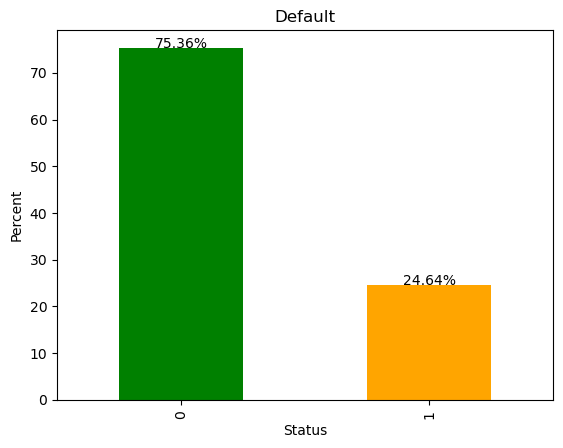

In [6]:
percent_class = (data['Status'].value_counts() / data.shape[0] * 100)
colors = ['green', 'orange']
percent_class.plot(kind='bar', label='Churn', ylabel='Percent', color=colors)
plt.title('Default')
for index in percent_class.keys():
    plt.text(index, percent_class[index], '{:.2f}%'.format(percent_class[index]),ha='center')

Доли объектов положительного и отрицательного класса существенно различаются, классы не сбалансированы. Выплаченных кредитов - 75%, а не выплаченных - 25%.

## 1.2 Распределение пропусков по признакам и целевой переменной.

В датасете достаточно много пропущенных данных. Рассмотрим процент пропущенных данных для каждого признака. 

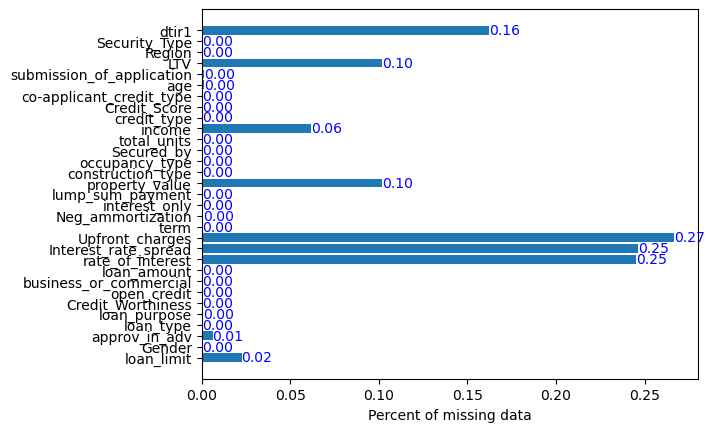

In [7]:
column_names = data.columns.to_list()
column_names.remove('Status')
amt_data = data.shape[0]
skipDataByFeatures = {}
for feature in column_names:
    prcnt_skip_data = data[feature].isnull().sum() / amt_data
    skipDataByFeatures[feature] = prcnt_skip_data
    

categories, values = list(skipDataByFeatures.keys()), list(skipDataByFeatures.values())
fig, ax = plt.subplots()
bars = ax.barh(categories, values)
ax.set_xlabel('Percent of missing data')
ax.bar_label(bars, label_type='edge', color='blue', labels= [f"{p:.2f}"  for p in values ])
plt.show()


Больше всего пропусков у признаков dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest. Рассмотрим пропуски по этим признакам относительно целевой переменой.

Text(0.5, 1.0, 'Percent of missed data by target')

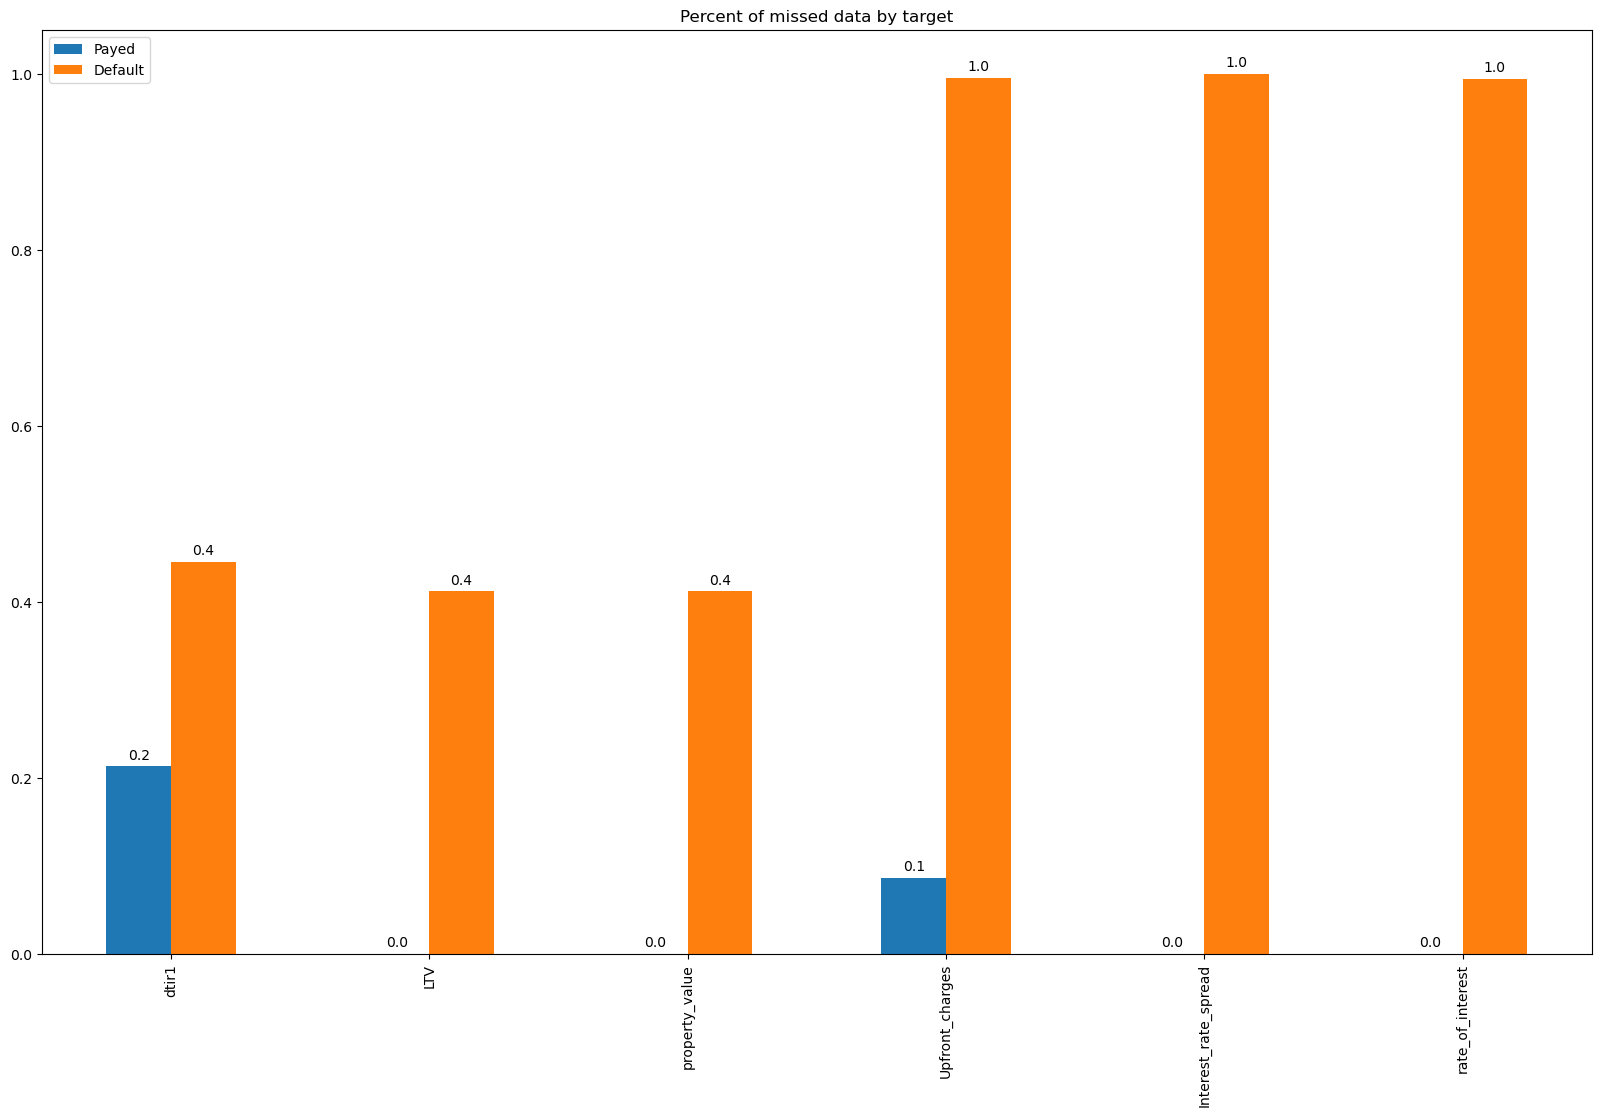

In [51]:
max_skip_features = ['dtir1', 'LTV', 'property_value', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest']
amt_default = data[data['Status'] == 1].shape[0]
amt_payed = data[data['Status'] == 1].shape[0]
skipDataByFeatures = {}
for feature in max_skip_features:
    prcnt_skip_data = data[data['Status'] == 0][feature].isnull().sum() / amt_payed
    skipDataByFeatures[feature] = [prcnt_skip_data]
    
    prcnt_skip_data = data[data['Status'] == 1][feature].isnull().sum() / amt_default
    skipDataByFeatures[feature].append(prcnt_skip_data)
missedData = pd.DataFrame(skipDataByFeatures.values(), skipDataByFeatures.keys(), columns=['Payed', 'Default'])
ax = missedData.plot(kind='bar', figsize=(20,12))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)
plt.title('Percent of missed data by target')

Выводы:
- Для не выполоченных кредитов (Default) полностью отсутствует информация о признаках rate_of_interest, interest_rate_spread, Upfront_charges, при этом в данных по этим признаков для выплаченных кредитов нет пропусков.
- Для не выполоченных кредитов (Default)  информация о признаках LTV, dtir1 отсутсвует примерно для 40% данных.
- Для выполоченных кредитов частично отсутствует информация о признаках LTV, dtir1 и income

Рассмотрим распределение целевого признака

# 2. EDA

## Числовые признаки

In [8]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Interest_rate_spread'}>],
       [<Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'dtir1'}>, <Axes: >]], dtype=object)

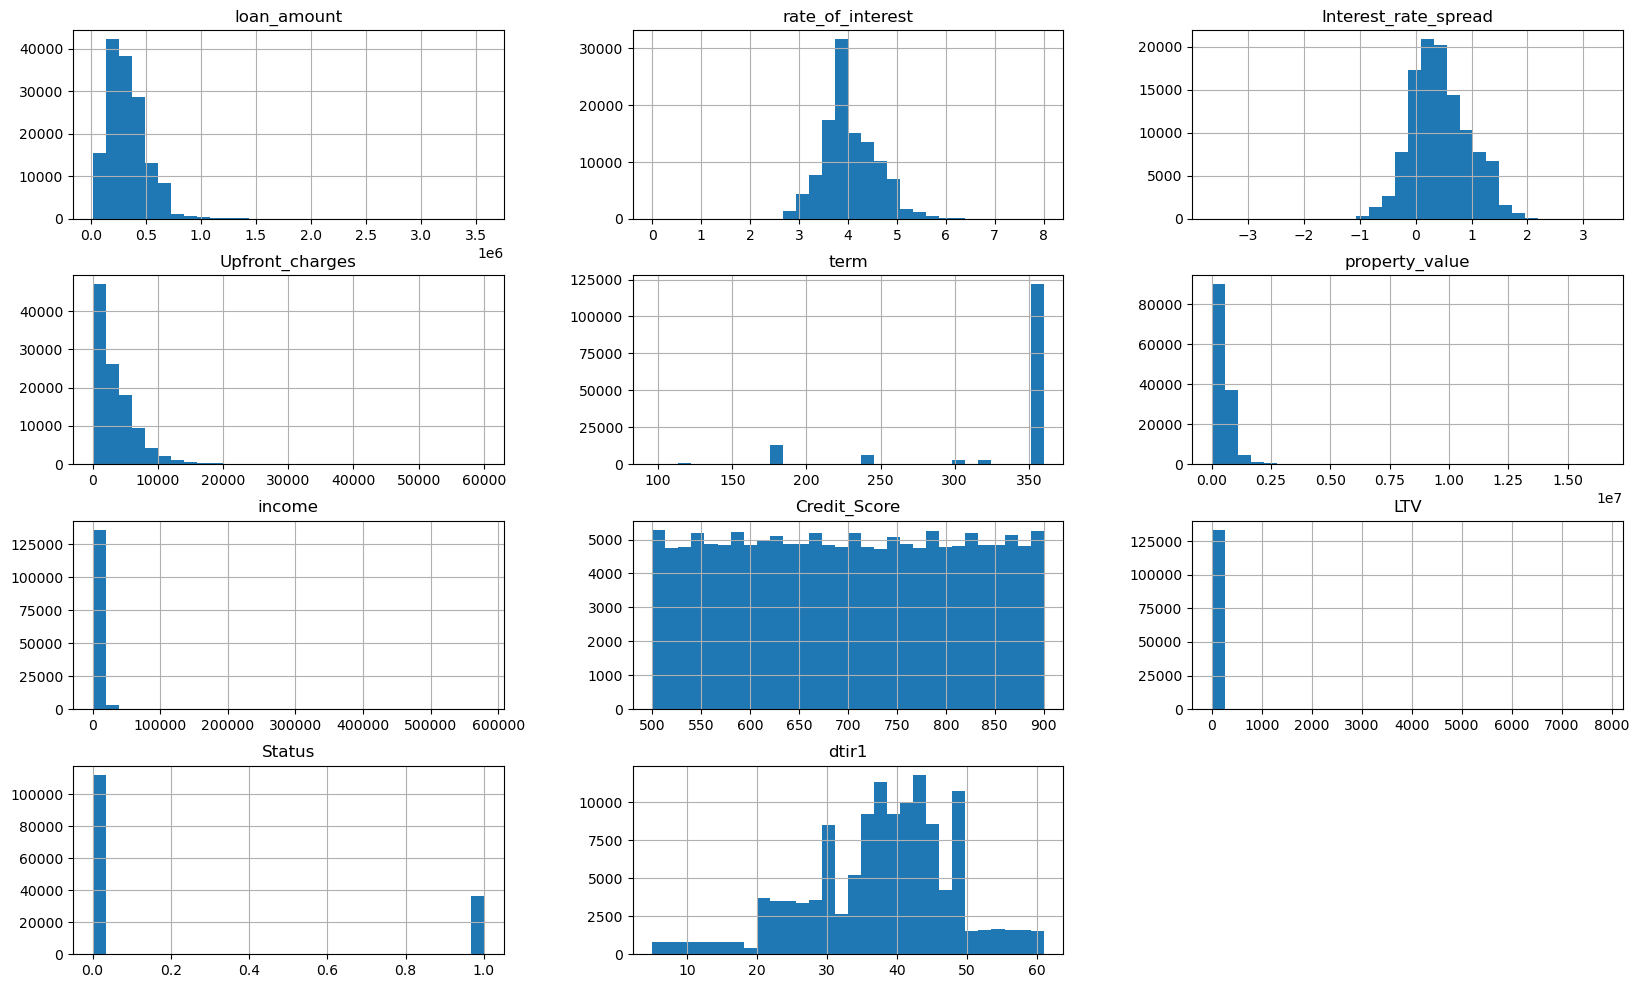

In [10]:
data[numeric_features].hist(figsize=(20,12), bins=30)

<Axes: >

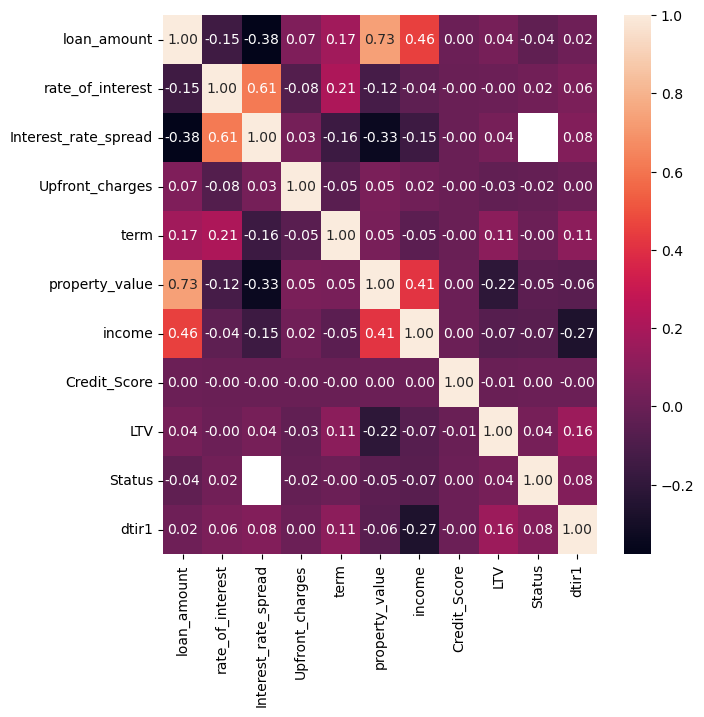

In [16]:
plt.figure(figsize = (7,7))
sns.heatmap(data[numeric_features].corr(),annot=True, fmt='.2f')

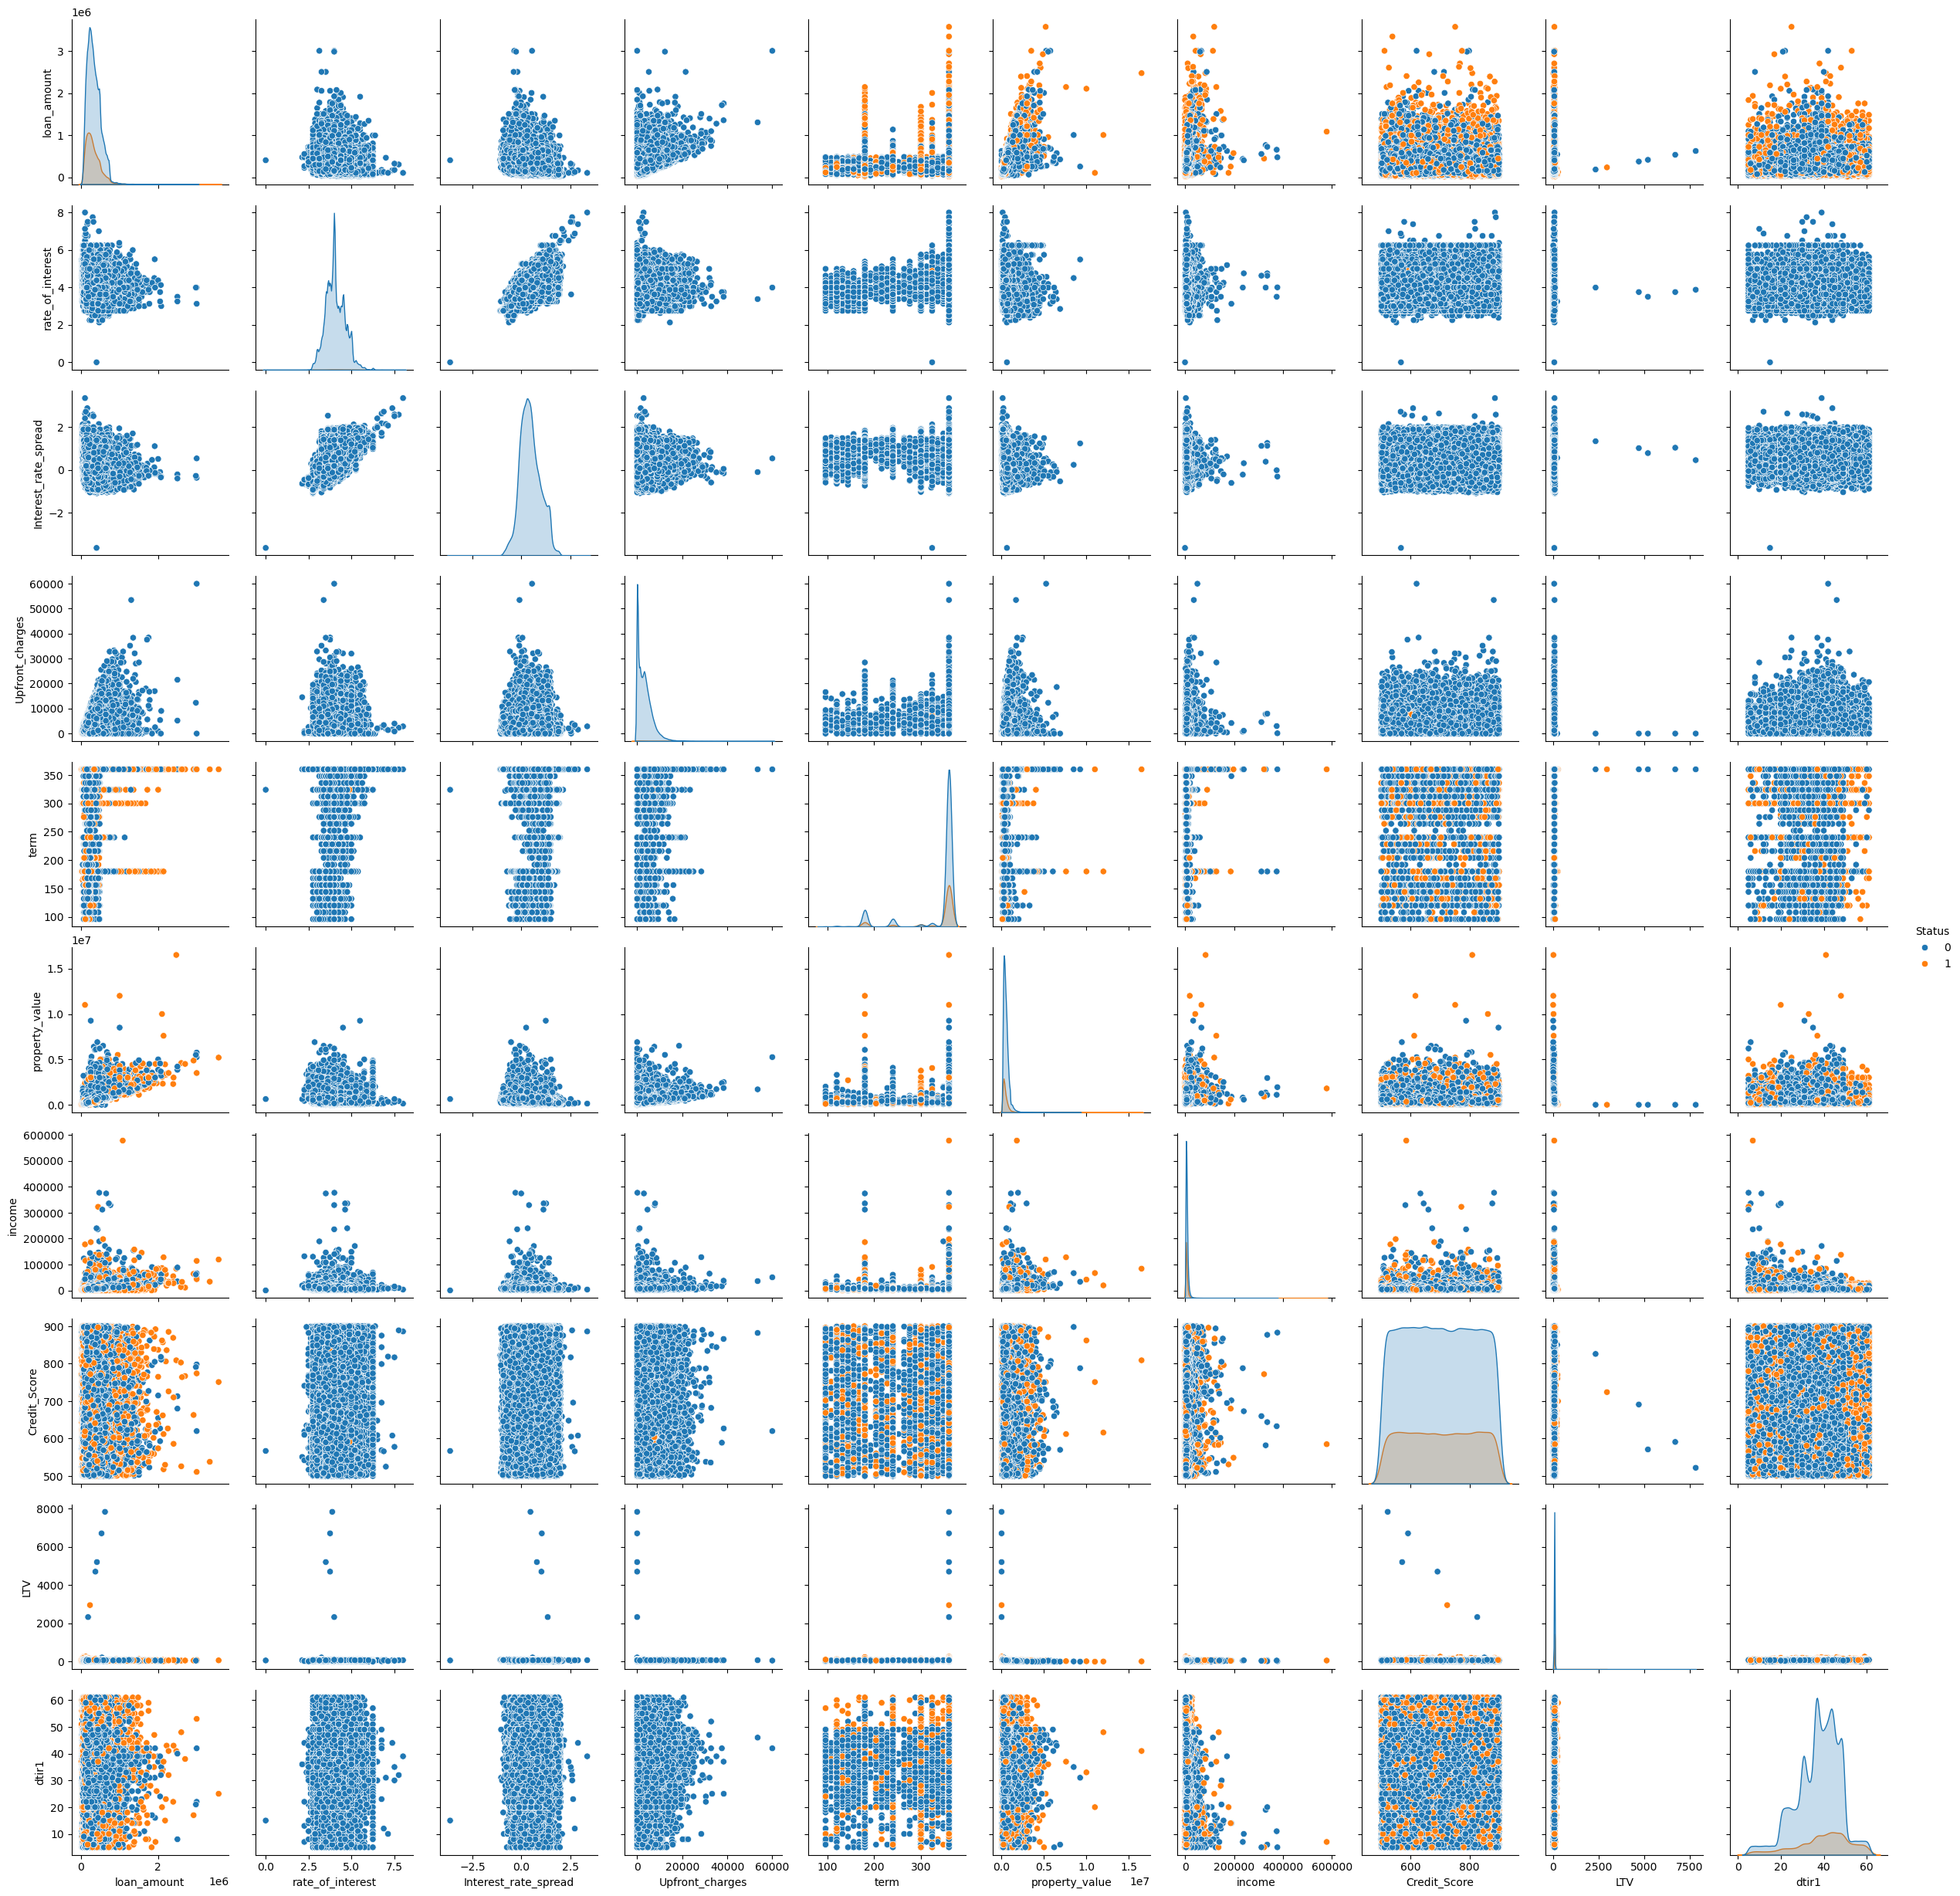

In [12]:
sns.pairplot(data[numeric_features], hue='Status')

Можно сделать следующие выводы:
- признаки loan_amount и property_value сильно взаимосвязаны. Это логично, потому что размер заёма для покупки недвижимости примерно равен цене приобретаемой недвижимости.
- loan_amount имеет зависимость с income. То есть сумма кредита зависит от дохода заёмщика.
- rate_of_interest и Interest_rate_spread тоже взаимосвязаны. Это связано с тем как вычисляется Interest_rate_spread. Разница в процентных ставках для кредита (interest rate spread) — это разница между процентной ставкой по выданному кредиту и ставкой, по которой банк сам привлекает средства
- Признак Interest_rate_spread показывает неадекватную корреляцию с целевой переменной. Это связано с тем, что для объектов с невыплаченным кредитом полностью отсутсвует информация про этот признак.
